In this notebook I just plot together the results from the numerical integration of the MF equations (both pairwise and higher-order) with the results from the stochastic simulations.

- MF results are stored in separate folders, according to the agreement rule: pairwise, higher-order (intersection) and higher-order (union).
- Results from simulations correspond to the case of idealised homogeneous populations of N = 1000 agents (homogeneous mixing).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import palettable as pltt
%matplotlib inline

plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2

# set the font family style
import matplotlib as mplt
mplt.rcParams['font.family'] = 'Avenir'
mplt.rcParams['pdf.fonttype'] = 42

## Fixed $\beta>0$ varying $p$

<ipython-input-8-b9454522ad9e>:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2,3,2)
<ipython-input-8-b9454522ad9e>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2,3,2)


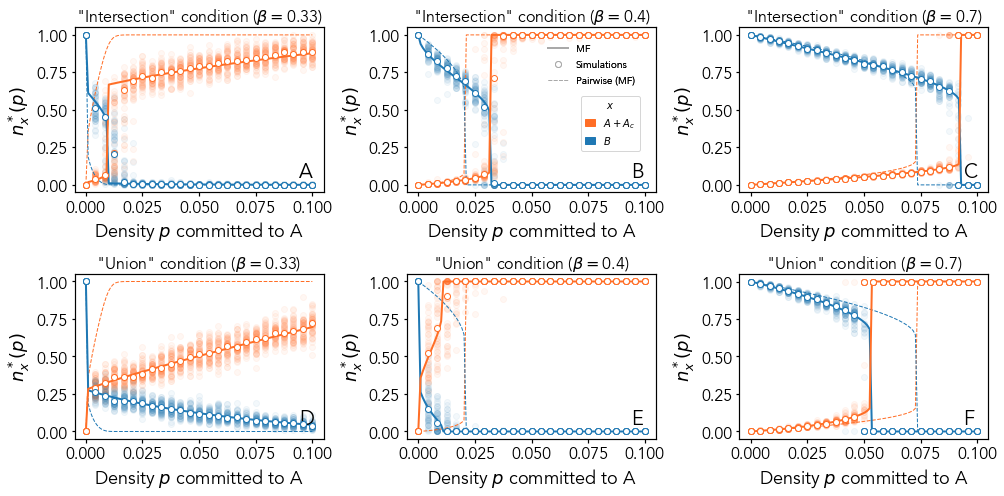

In [8]:
betas = [0.33,0.4,0.7]

plt.figure(figsize=(14,7))

ls = ['-','-']

colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
symbol_to_color = {'A':'#ff6e26', 'B':colors[1], 'AB':'white'}
colors = [symbol_to_color['A'], symbol_to_color['B']] 

lw = [2, 2]
zorder = [3, 2]
axlabels = ['A', 'B', 'C', 'D', 'E', 'F']
n_runs = 50

iax = 1
for rule in ['intersection', 'union']:
    for beta in betas:
        ax = plt.subplot(2,3,iax)
        
        #Plotting pairwise (MF) results
        fname = '../Results/MF/%s/fixed_beta%.4f_varp.csv'%('pairwise',beta)
        pwdf = pd.read_csv(fname)
        ax.plot(pwdf['p'], pwdf['n_Ap'], ls='--', color=colors[0], lw=1, zorder=0)
        ax.plot(pwdf['p'], pwdf['n_B'], ls='--', color=colors[1], lw=1, zorder=0)

        #Plotting MF results
        fname = '../Results/MF/%s/fixed_beta%.4f_varp.csv'%(rule,beta)
        df = pd.read_csv(fname)
        ax.plot(df['p'], df['n_Ap'], ls=ls[0], color=colors[0], lw=lw[0], zorder=zorder[0])
        ax.plot(df['p'], df['n_B'], ls=ls[1], color=colors[1], lw=lw[1], zorder=zorder[1])
        
        #Plotting simulations results 
        tensor = []
        for ii, run_id in enumerate(range(n_runs)):
            fname = '../Results/Simulations/HONG_2words_HomMix/%s/fixed_beta_varp_run%i/summary_beta%.4f.csv'%(rule, run_id, beta)
            df = pd.read_csv(fname)
            ax.scatter(df['p'], df['avg_n_A+p'], color=colors[0], alpha=0.05, zorder=0)
            ax.scatter(df['p'], df['avg_n_B'], color=colors[1], alpha=0.05, zorder=0) #'#ffbd9c'
            
            #Creating also a tensor from which I will get average values
            tensor.append(df.to_numpy())
            
        #Taking the average from simulations and plotting it
        tensor = np.array(tensor)
        med_tensor = np.median(tensor, axis=0)
        med_df = pd.DataFrame(med_tensor, index=None,
                              columns=['p','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
        ax.scatter(med_df['p'], med_df['avg_n_A+p'], color='white', edgecolors=colors[0], zorder=4)
        ax.scatter(med_df['p'], med_df['avg_n_B'], color='white', edgecolors=colors[1], zorder=4)

        ax.set_xlabel(r'Density $p$ committed to A', size=18)
        ax.set_ylabel(r'$n_x^*(p)$', size=18)
        #ax.set_xlim(df['p'].min(), df['p'].max())
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_title('"'+rule.capitalize()+r'" condition ($\beta=$'+str(beta)+')', size=16)    

        ax.annotate(axlabels[iax-1], xy=(0.9, 0.09), xycoords="axes fraction", fontsize=20, fontweight="bold")
        
        iax+=1
        
#Adding custom legend
ax = plt.subplot(2,3,2)
handles = [mpatches.Patch(color=colors[0]), mpatches.Patch(color=colors[1])]
labels = [r'$A+A_c$', r'$B$']
lg1 = ax.legend(handles, labels, loc=(0.7,0.25), title='$x$', handlelength=1)

ax = plt.subplot(2,3,2)
handles = [Line2D([0], [0], color='darkgray', linewidth=lw[0], linestyle=ls[0]),
           Line2D([0], [0], color='darkgray', mfc='white', marker='o', linestyle=''),
           Line2D([0], [0], color='darkgray', linewidth=1, linestyle='--')]
labels = [r'MF', r'Simulations', r'Pairwise (MF)']
lg2 = ax.legend(handles, labels, loc=(0.55,0.62), frameon=False)

ax.add_artist(lg1)
ax.add_artist(lg2)

plt.tight_layout()

## Fixed $p>0$ varying $\beta$

<ipython-input-11-0d3735a71751>:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2,3,1)
<ipython-input-11-0d3735a71751>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2,3,1)


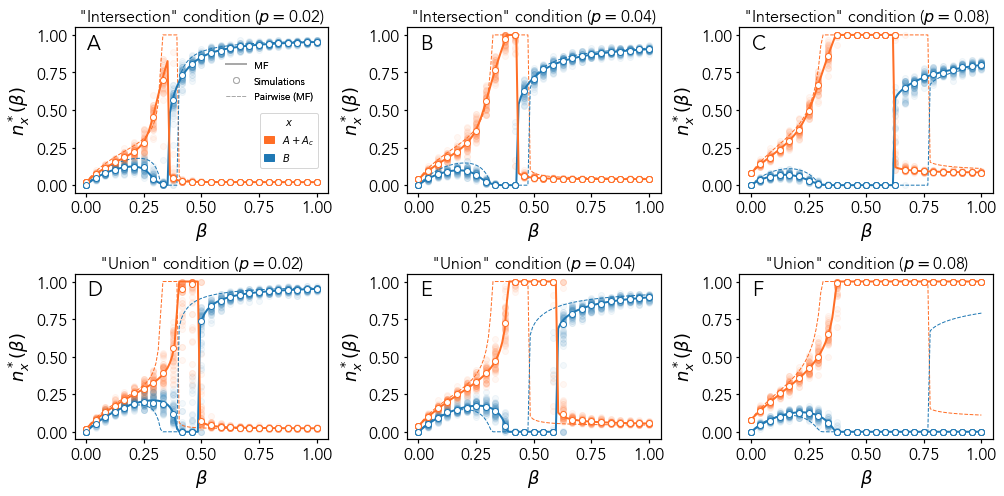

In [11]:
from matplotlib.lines import Line2D

ps = [0.02,0.04,0.08]#[0.02, 0.08, 0.16]

plt.figure(figsize=(14,7))

ls = ['-','-']

colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
symbol_to_color = {'A':'#ff6e26', 'B':colors[1], 'AB':'white'}
colors = [symbol_to_color['A'], symbol_to_color['B']] 

lw = [2, 2]
zorder = [3, 2]
axlabels = ['A', 'B', 'C', 'D', 'E', 'F']
n_runs = 50

iax = 1
for rule in ['intersection', 'union']:
    for p in ps:
        ax = plt.subplot(2,3,iax)
        
        #Plotting pairwise (MF) results
        fname = '../Results/MF/%s/fixed_p%.4f_varbeta.csv'%('pairwise',p)
        pwdf = pd.read_csv(fname)
        ax.plot(pwdf['beta'], pwdf['n_Ap'], ls='--', color=colors[0], lw=1, zorder=0)
        ax.plot(pwdf['beta'], pwdf['n_B'], ls='--', color=colors[1], lw=1, zorder=0)

        #Plotting MF results
        fname = '../Results/MF/%s/fixed_p%.4f_varbeta.csv'%(rule,p)
        df = pd.read_csv(fname)
        ax.plot(df['beta'], df['n_Ap'], ls=ls[0], color=colors[0], lw=lw[0], zorder=zorder[0])
        ax.plot(df['beta'], df['n_B'], ls=ls[1], color=colors[1], lw=lw[1], zorder=zorder[1])
        
        #Plotting simulations results 
        tensor = []
        for ii, run_id in enumerate(range(n_runs)):
            fname = '../Results/Simulations/HONG_2words_HomMix/%s/fixed_p_varbeta_run%i/summary_p%.4f.csv'%(rule, run_id, p)
            df = pd.read_csv(fname)
            ax.scatter(df['beta'], df['avg_n_A+p'], color=colors[0], alpha=0.05, zorder=0)
            ax.scatter(df['beta'], df['avg_n_B'], color=colors[1], alpha=0.05,zorder=0) #'#ffbd9c'
            
            #Creating also a tensor from which I will get average values
            tensor.append(df.to_numpy())
            
        #Taking the average from simulations and plotting it
        tensor = np.array(tensor)
        med_tensor = np.median(tensor, axis=0)
        med_df = pd.DataFrame(med_tensor, index=None,
                              columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
        ax.scatter(med_df['beta'], med_df['avg_n_A+p'], color='white', edgecolors=colors[0], zorder=4)
        ax.scatter(med_df['beta'], med_df['avg_n_B'], color='white', edgecolors=colors[1], zorder=4)

        ax.set_xlabel(r'$\beta$', size=18)
        ax.set_ylabel(r'$n_x^*(\beta)$', size=18)
        #ax.set_xlim(df['p'].min(), df['p'].max())
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_title('"'+rule.capitalize()+r'" condition ($p=$'+str(p)+')', size=16)    

        ax.annotate(axlabels[iax-1], xy=(0.05, 0.87), xycoords="axes fraction", fontsize=20, fontweight="bold")
        
        iax+=1
        
#Adding custom legend
ax = plt.subplot(2,3,1)
handles = [mpatches.Patch(color=colors[0]), mpatches.Patch(color=colors[1])]
labels = [r'$A+A_c$', r'$B$', r'MF', r'Simulations', r'Pairwise (MF)']
lg1 = ax.legend(handles, labels, loc=(0.73,0.15), title='$x$', handlelength=1)

ax = plt.subplot(2,3,1)
handles = [Line2D([0], [0], color='darkgray', linewidth=lw[0], linestyle=ls[0]),
           Line2D([0], [0], color='darkgray', mfc='white', marker='o', linestyle=''),
           Line2D([0], [0], color='darkgray', linewidth=1, linestyle='--')]
labels = [r'MF', r'Simulations', r'Pairwise (MF)']
lg2 = ax.legend(handles, labels, loc=(0.58,0.52), frameon=False)

ax.add_artist(lg1)
ax.add_artist(lg2)

plt.tight_layout()